In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from data_cleanup import *

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [110]:
df = load_reduced_df()

In [111]:
df

,ccode,cname,year,ccode_qog,cname_qog,ccodealp,ccodecow,version,cname_year,ccodealp_year,...,wwbi_sprpempp,wwbi_sprpemps,wwbi_sprpempt,wwbi_spupempn,wwbi_spupempp,wwbi_spupemps,wwbi_spupempt,wwbi_tertiarypubsec,region,sub-region
59,4,Afghanistan,2005,4,Afghanistan,AFG,700.0,QoGStdTSjan22,Afghanistan 2005,AFG05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,Southern Asia
61,4,Afghanistan,2007,4,Afghanistan,AFG,700.0,QoGStdTSjan22,Afghanistan 2007,AFG07,...,0.128090,0.117742,0.012774,0.168941,0.096384,0.446096,0.288579,0.677745,Asia,Southern Asia
62,4,Afghanistan,2008,4,Afghanistan,AFG,700.0,QoGStdTSjan22,Afghanistan 2008,AFG08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,Southern Asia
63,4,Afghanistan,2009,4,Afghanistan,AFG,700.0,QoGStdTSjan22,Afghanistan 2009,AFG09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,Southern Asia
64,4,Afghanistan,2010,4,Afghanistan,AFG,700.0,QoGStdTSjan22,Afghanistan 2010,AFG10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,Southern Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14930,894,Zambia,2013,894,Zambia,ZMB,551.0,QoGStdTSjan22,Zambia 2013,ZMB13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,Sub-Saharan Africa
14931,894,Zambia,2014,894,Zambia,ZMB,551.0,QoGStdTSjan22,Zambia 2014,ZMB14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,Sub-Saharan Africa
14932,894,Zambia,2015,894,Zambia,ZMB,551.0,QoGStdTSjan22,Zambia 2015,ZMB15,...,0.172776,0.578589,0.219818,0.017781,0.109138,0.342219,0.530862,0.501821,Africa,Sub-Saharan Africa
14933,894,Zambia,2016,894,Zambia,ZMB,551.0,QoGStdTSjan22,Zambia 2016,ZMB16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,Sub-Saharan Africa


- group by country
- divide in train and test datasets
- check that each contry has enough points
- check how regions are balanced
- 2 versions: all cols and cols without nulls
- run feature selection on all cols and cols wout nulls
- run a simple model ? check how feature selection performs?
- check for highly correlated cols in feat selection?

### Check that each country has enough points

In [6]:
df.groupby('cname').year.nunique().agg(['mean', 'min', 'max'])

mean    15.902299
min      1.000000
max     19.000000
Name: year, dtype: float64

In [8]:
df.groupby('cname').year.nunique()[df.groupby('cname').year.nunique() < 5]

cname
Fiji    1
Name: year, dtype: int64

In [9]:
df[df.cname == 'Fiji']

,ccode,cname,year,ccode_qog,cname_qog,ccodealp,ccodecow,version,cname_year,ccodealp_year,...,wwbi_sprpempp,wwbi_sprpemps,wwbi_sprpempt,wwbi_spupempn,wwbi_spupempp,wwbi_spupemps,wwbi_spupempt,wwbi_tertiarypubsec,region,sub-region
4438,242,Fiji,2005,242,Fiji,FJI,950.0,QoGStdTSjan22,Fiji 2005,FJI05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oceania,Melanesia


### Check how regions are balanced

In [32]:
region_count = pd.DataFrame(df.groupby('sub-region').cname.count()).reset_index(drop=False)
region_count.columns = ['sub-region', 'num of samples']

region_country_count = pd.DataFrame(df.groupby('sub-region').cname.nunique()).reset_index(drop=False)
region_country_count.columns = ['sub-region', 'num of countries']

region_info_df = region_count.merge(region_country_count, on='sub-region')
region_info_df = region_info_df.melt(id_vars=['sub-region'], value_vars=['num of samples', 'num of countries'])

Text(0.5, 1.0, 'Regions by number of countries')

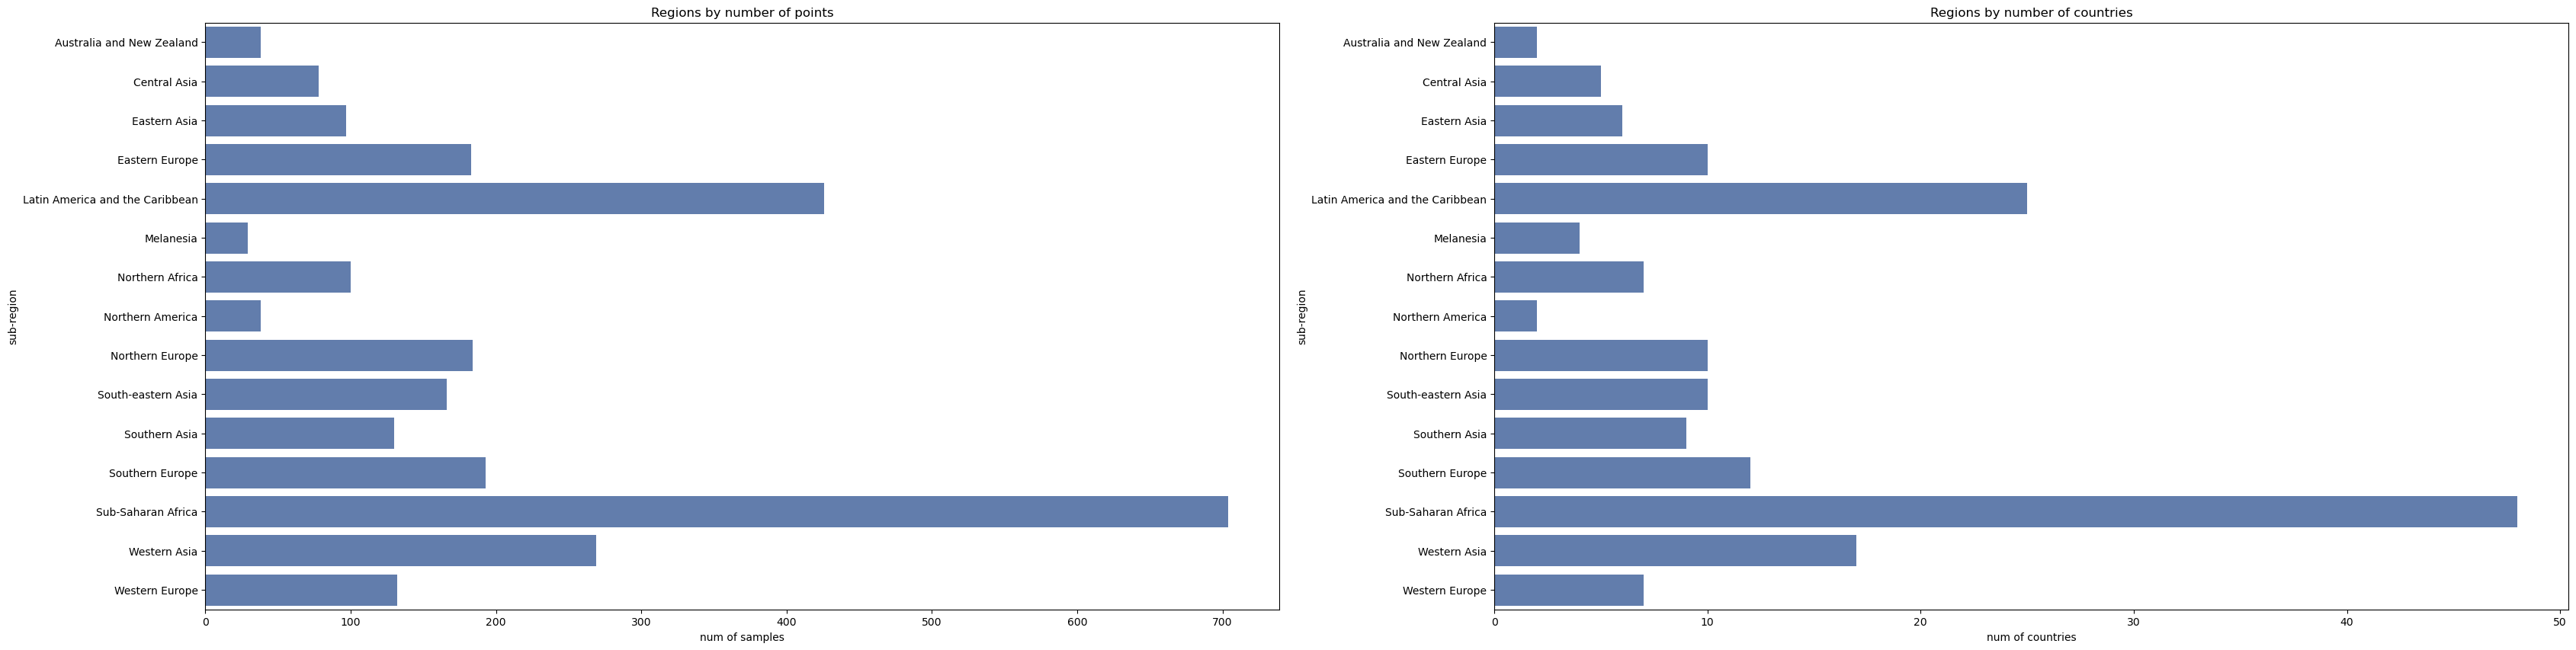

In [58]:
_, ax = plt.subplots(1, 2, figsize=(40, 10))
sns.barplot(data=region_count, y='sub-region', x='num of samples', color='#567ab8', ax=ax[0])
ax[0].set_title('Regions by number of points')
sns.barplot(data=region_country_count, y='sub-region', x='num of countries', color='#567ab8', ax=ax[1])
ax[1].set_title('Regions by number of countries')

### Create test and train datasets

In [69]:
random_state = 424242

In [66]:
country_data = pd.DataFrame(df.groupby('cname')['sub-region'].min())
country_data = country_data.reset_index(drop=False)

In [67]:
country_data

,cname,sub-region
0,Afghanistan,Southern Asia
1,Albania,Southern Europe
2,Algeria,Northern Africa
3,Angola,Sub-Saharan Africa
4,Argentina,Latin America and the Caribbean
...,...,...
169,Venezuela (Bolivarian Republic of),Latin America and the Caribbean
170,Viet Nam,South-eastern Asia
171,Yemen,Western Asia
172,Zambia,Sub-Saharan Africa


Stratify by region, so that each region is in a train and test dataset

In [70]:
X_train, X_test, y_train, y_test = train_test_split(country_data, country_data['cname'], test_size=0.2, random_state=random_state, stratify=country_data['sub-region'])

In [72]:
X_train.groupby('sub-region').cname.nunique()

sub-region
Australia and New Zealand           2
Central Asia                        4
Eastern Asia                        5
Eastern Europe                      8
Latin America and the Caribbean    20
Melanesia                           3
Northern Africa                     6
Northern America                    2
Northern Europe                     8
South-eastern Asia                  8
Southern Asia                       7
Southern Europe                     9
Sub-Saharan Africa                 38
Western Asia                       13
Western Europe                      6
Name: cname, dtype: int64

In [73]:
X_test.groupby('sub-region').cname.nunique()

sub-region
Central Asia                        1
Eastern Asia                        1
Eastern Europe                      2
Latin America and the Caribbean     5
Melanesia                           1
Northern Africa                     1
Northern Europe                     2
South-eastern Asia                  2
Southern Asia                       2
Southern Europe                     3
Sub-Saharan Africa                 10
Western Asia                        4
Western Europe                      1
Name: cname, dtype: int64

Check that each country is either in train or test dataset

In [75]:
set(X_train.cname.unique()).intersection(X_test.cname.unique())

set()

In [ ]:
df_cols_reduced = df.dropna(h)

In [145]:
feat_col_start_full = 10
feat_col_start_reduced = 9

In [184]:
df_cols_reduced = df.dropna(how='any', axis=1)

In [186]:
corr_cols = ['bci_bci', 'ti_cpi', 'vdem_corr', 'vdem_execorr', 'vdem_jucorrdc', 'vdem_pubcorr', 'wbgi_cce']
feats_cols = [c for c in df.columns[feat_col_start:-2] if c not in corr_cols]
feats_cols_reduced = [c for c in df_cols_reduced.columns[feat_col_start:-2] if c not in corr_cols]

In [201]:
def divide_into_test_train(df, target, feats_cols, corr_column='wbgi_cce'):
    x = df.copy()
    y = x.loc[:, corr_column]
    x = x[x.cname.isin(target)].loc[:, feats_cols]
    return x, y

In [202]:
x_train_full, y_train_full = divide_into_test_train(df, y_train, feats_cols)
x_test_full, y_test_full = divide_into_test_train(df, y_test, feats_cols)

In [203]:
x_train_reduced, y_train_reduced = divide_into_test_train(df_cols_reduced, y_train, feats_cols_reduced)
x_test_reduced, y_test_reduced = divide_into_test_train(df_cols_reduced, y_test, feats_cols_reduced)

### Feature selection

In [204]:
feat_selector = SelectKBest(f_regression, k=20)

In [206]:
x_train_full.info(verbose=True, memory_usage='deep', show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2206 entries, 59 to 14934
Data columns (total 1896 columns):
 #     Column                  Non-Null Count  Dtype  
---    ------                  --------------  -----  
 0     aid_cpnc                419 non-null    float64
 1     aid_cpsc                419 non-null    float64
 2     aid_crnc                1233 non-null   float64
 3     aid_crnio               1259 non-null   float64
 4     aid_crsc                1233 non-null   float64
 5     aid_crsio               1259 non-null   float64
 6     aii_acc                 209 non-null    float64
 7     aii_aio                 209 non-null    float64
 8     aii_cilser              209 non-null    float64
 9     aii_elec                209 non-null    float64
 10    aii_pubm                209 non-null    float64
 11    aii_q01                 209 non-null    float64
 12    aii_q02                 209 non-null    float64
 13    aii_q03                 209 non-null    float64
 14    ai

In [205]:
feat_selector.fit(x_train_full, y_train_full)

ValueError: could not convert string to float: '11/24/2002'